In [5]:
#Import
# !pip install mglearn
# import mglearn
# import csv # Pandas 사용 안할때 대체

import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import cgitb
from numpy.lib import tracemalloc_domain

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Formatting

pd.set_option('display.width', 2000)
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 10)

데이터 수집

In [7]:
#데이터 불러오기
data = pd.read_csv('Organized_AiDataset.csv')

# # 전체 데이터 모양 확인 및 데이터 출력
# setPrintLength(0)
# print (len(data.index))
# print (data)

cgitb.enable()

Functions

In [8]:
def setPrintLength(x):
  np.set_printoptions(threshold=x)

In [9]:
def column_Initial_Setting():
    i = 0
    for i in data.index: 
      if data.loc[i, ('Class')] == "Music":
          data.loc[i, ('Class')] = 1
      elif data.loc[i, ('Class')] == "Language":
          data.loc[i, ('Class')] = 2
      elif data.loc[i, ('Class')] == "Mathmatics":
          data.loc[i, ('Class')] = 3
      elif data.loc[i, ('Class')] == "Physical Orientation":
          data.loc[i, ('Class')] = 4
      elif data.loc[i, ('Class')] == "Area":
          data.loc[i, ('Class')] = 5
      elif data.loc[i, ('Class')] == "Nature":
          data.loc[i, ('Class')] = 6
      elif data.loc[i, ('Class')] == "Introspection":
          data.loc[i, ('Class')] = 7
      elif data.loc[i, ('Class')] == "Interpersonal Relationship":
          data.loc[i, ('Class')] = 8

In [10]:
def typeChanger(df, x_test):

#케이스 0번: 이름 -> 숫자
  if (x_test == 0):
    if df == "Music":
        df = 1
    elif df == "Language":
        df = 2
    elif df == "Mathmatics":
        df = 3
    elif df == "Physical Orientation":
        df = 4
    elif df == "Area":
        df = 5
    elif df == "Nature":
        df = 6
    elif df == "Introspection":
        df = 7
    elif df == "Interpersonal Relationship":
        df = 8

#케이스 1번: 숫자 -> 이름
  elif (x_test == 1):
    if df == 1:
        df = "Music"
    elif df == 2:
        df = "Language"
    elif df == 3:
        df = "Mathmatics"
    elif df == 4:
        df = "Physical Orientation"
    elif df == 5:
        df = "Area"
    elif df == 6:
        df = "Nature"
    elif df == 7:
        df = "Introspection"
    elif df == 8:
        df = "Interpersonal Relationship"
  return df

데이터 정리 및 분류

In [11]:
# 숫자 데이터 선택 저장 및 출력
numData = data.drop(data.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], axis = 1)
print (numData.shape)

# 이름 데이터 선택 저장 및 출력
classData = data.loc[:, ['Class']].values
print (classData.shape)

# # 이름데이터 숫자화
# # column_Initial_Setting()
# print (type(classData))

# 인공지능 학습 위한 훈련 데이터 제작
x_train, x_test, y_train, y_test = train_test_split(numData, classData, test_size=0.1999)

# # 이름 데이터 숫자화 재지정
# # y_train = y_train.astype('int')
# # y_test = y_test.astype('int')
# print()

# 분할 데이터 모양 확인
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

# 데이터 출력량
setPrintLength(0)

# 훈련 데이터 확인
print(x_train)
print (type (y_train))

(9999, 8)
(9999, 1)
x_train.shape =  (8000, 8)
y_train.shape =  (8000, 1)
x_test.shape =  (1999, 8)
y_test.shape =  (1999, 1)
      Music.1  Language.1  Mathmatics.1  Physical Orientation.1  Area.1  Nature.1  Introspection.1  Interpersonal Relationship.1
3608     0.11        0.12          0.01                    0.38    0.04      0.10             0.13                          0.10
7909     0.07        0.09          0.00                    0.02    0.06      0.05             0.12                          0.59
54       0.48        0.14          0.02                    0.03    0.05      0.15             0.13                          0.02
5970     0.04        0.05          0.15                    0.15    0.06      0.39             0.04                          0.12
4428     0.12        0.10          0.01                    0.10    0.47      0.07             0.02                          0.10
...       ...         ...           ...                     ...     ...       ...              ...  

AI 훈련 및 테스트

In [12]:
# KNN의 객체 분류 세팅 생성
knn = KNeighborsClassifier(n_neighbors=250)

# KNN 타입 보기
# print(type(knn))

# 훈련 데이터를 사용하여 인공지능 모델 학습
knn.fit(x_train,y_train.ravel())

# # Neighbor 수에 따른 인공지능 정확도 표시 (200 부터 253 까지)
# for n in range (200, 253):
#   highest_score = 0
#   highest_knn = 0
#   knn.n_neighbors = n
#   score = knn.score(x_test, y_test)
  
#   if (score < 1) :
#     score = score * 100 + 9
#     if (score > highest_score):
#       highest_score = score
#       highest_knn = n
#     print("Attempt [{}]; Accuracy: {}%".format(n, score))
#     continue
# print ("highest Knn value: {}".format(highest_knn))
# knn.n_neighbors = highest_knn

# # 임시 인공지능 Neighbor 수 
# knn.n_neighbors = 250

# 학습된 knn 모델로 새 변수 예측
setPrintLength(0)
print()
print("-----------------------------------------------------------------")
y_pred = knn.predict(x_test)
#np.set_printoptions(threshold = 3)
print('Prediction:\n', y_pred)
print('Answer: \n', y_test)

# print (type(y_pred))
# print (type(y_test))

# 모델 평가
score = knn.score(x_test, y_test)
print('Attempted Percentage : {0:.2f}%'.format(score*100))
print("-----------------------------------------------------------------")


-----------------------------------------------------------------
Prediction:
 ['Area' 'Area' 'Interpersonal Relationship' ... 'Introspection'
 'Physical Orientation' 'Nature']
Answer: 
 [['Area']
 ['Area']
 ['Interpersonal Relationship']
 ...
 ['Introspection']
 ['Physical Orientation']
 ['Nature']]
Attempted Percentage : 95.90%
-----------------------------------------------------------------


AI 테스트용 사전 코드 (PCA 사용 전)

In [13]:
#                              테스트용 코드

# 데이터 클래스 이름: Music.1  Language.1  Mathmatics.1  Physical Orientation.1  Area.1 Nature.1  Introspection.1  Interpersonal Relationship

# Option 1 Deleted

# Option 2) 테스트용 데이터 값 직접 설정 (Setting Test Values Manually):
music = 39
lang = 22
math = 330
phys = 87
area = 89
nature = 30
intro = 70
inter = 43

# 평균 계산 (Calculating Average for Each Data)
total = music + lang + math + phys + area + nature + intro + inter
musicAverage = music / total
langAverage = lang / total
mathAverage = math / total
physAverage = phys / total
areaAverage = area / total
natureAverage = nature / total
introAverage = intro / total
interAverage = inter / total

# 결과값 예측용 데이터 프레임 제작 (Creating DataFrame for Testing)
d = {'Music': [musicAverage], 'Language': [langAverage] , 'Mathmatics': [mathAverage], 
     'Physical Orientation': [physAverage], 'Area': [areaAverage], 'Nature': [natureAverage], 
     'Introspection': [introAverage], 'Interpersonal Relationship': [interAverage]}

df_test = pd.DataFrame(data = d)

# 데이터 프레임 확인 (Checking DataFrame)
print (df_test.shape)
print (df_test)

setPrintLength(np.inf)

# 클래스 결과값 예측 (Defining Class for Test Value)
y_pred = knn.predict(df_test)
y_pred = typeChanger(y_pred, 1)


print ("")
print ("")
print ("--------------------------------------------------------------------------------------------------------------")
print ("예상 분류: ", y_pred)

print(pd.DataFrame(knn.predict_proba(df_test), columns=knn.classes_))

print ("--------------------------------------------------------------------------------------------------------------")

(1, 8)
     Music  Language  Mathmatics  Physical Orientation      Area    Nature  Introspection  Interpersonal Relationship
0  0.05493  0.030986    0.464789              0.122535  0.125352  0.042254       0.098592                    0.060563


--------------------------------------------------------------------------------------------------------------
예상 분류:  ['Mathmatics']
   Area  Interpersonal Relationship  Introspection  Language  Mathmatics  Music  Nature  Physical Orientation
0   0.0                         0.0            0.0       0.0         1.0    0.0     0.0                   0.0
--------------------------------------------------------------------------------------------------------------


PCA

In [14]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler

numData_pca = numData #표준화 할 데이터
classData_pca = classData #dataset에 맞는 이름 데이터 

numData_standardized = StandardScaler().fit_transform(numData_pca) 
d = {'Music', 'Language', 'Mathmatics', 
     'Physical_Orientation', 'Area', 'Nature', 
     'Introspection', 'Interpersonal_Relationship'}
print(pd.DataFrame(numData_standardized, columns = d).head())

# PCA 제작 (2d)
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #차원을 2차원까지 줄임
printcipalComponents = pca.fit_transform(numData_standardized) # PCA 데이터 저장
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2']) # PCA 데이터를 데이터 프레임 (Data Frame) 형식으로 저장
dfY_test = pd.DataFrame(classData_pca, columns = {'Class'}) # PCA 데이터 프레임에 Class 데이터 추가 (2d)
# dfY_test = dfY_test.drop(dfY_test.index[:8000]) #테스트 데이터만 출력 #해당 줄 코맨트 시 모든 데이터 출력
finalDf = pd.concat([principalDf, dfY_test], axis = 1)
print(finalDf)
print("") 

# PCA 제작 (3d)
pca_3d = PCA(n_components=3)
pComp_3d = pca_3d.fit_transform(numData_standardized) # PCA 데이터 저장
pDf_3d = pd.DataFrame(data=pComp_3d, columns = ['principal component1', 'principal component2', 'principal component3']) # PCA 데이터를 데이터 프레임 (Data Frame) 형식으로 저장
# pDf_3d = pDf_3d.drop(pDf_3d.index[:8000]) #테스트 데이터만 출력 #해당 줄 코맨트 시 모든 데이터 출력
#print(pDf_3d.shape)


dfY_test_3d = pd.DataFrame(classData_pca, columns = {'Class'}) # PCA 데이터 프레임에 Class 데이터 추가 (3d)
finalDf_3d = pd.concat([pDf_3d, dfY_test_3d], axis = 1)


#제작된 PCA가 가지고 있는 전체 데이터 포함도 표시
print("전체 데이터 포함도: ") 
#print(pca.explained_variance_ratio_)
print("%.2f" % float((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100), "%")

   Interpersonal_Relationship     Music  Introspection    Nature  Physical_Orientation  Mathmatics  Language      Area
0                    2.506875 -1.003995       0.398991  0.128191             -1.097492    0.223267 -0.216208 -0.987497
1                    2.682597 -0.916552      -0.214632 -0.392014              0.133418   -0.124859 -0.471447 -0.647689
2                    2.858319 -0.217004      -0.039311 -0.218612             -0.569960   -0.908144 -0.216208 -0.562737
3                    2.331153 -0.217004      -0.477613 -0.738817             -0.569960   -0.298923  0.209189 -0.222928
4                    2.770458 -0.916552      -1.003576  0.301593             -1.097492   -0.734081  0.294268  0.286785
      principal component1  principal component2                       Class
0                -1.171971             -0.221764                       Music
1                -1.505980              0.643193                       Music
2                -1.283498             -0.003510       

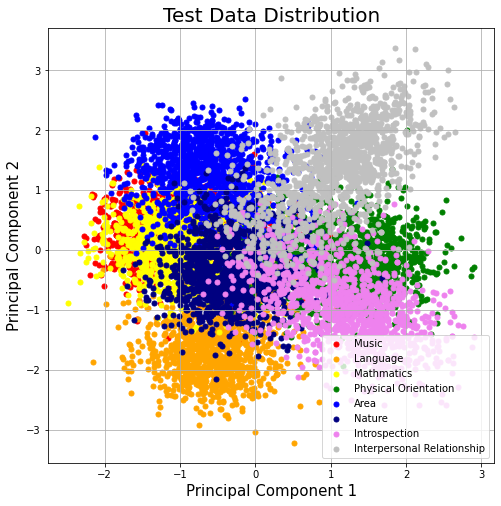

In [15]:
#그래프 2d
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Test Data Distribution', fontsize=20)
targets = ['Music', 'Language', 'Mathmatics', 'Physical Orientation', 'Area', 'Nature', 'Introspection', 'Interpersonal Relationship']
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'violet', 'silver']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component1'], principalDf.loc[indicesToKeep, 'principal component2'], c = color, s = 25)
ax.legend(targets)
ax.grid()

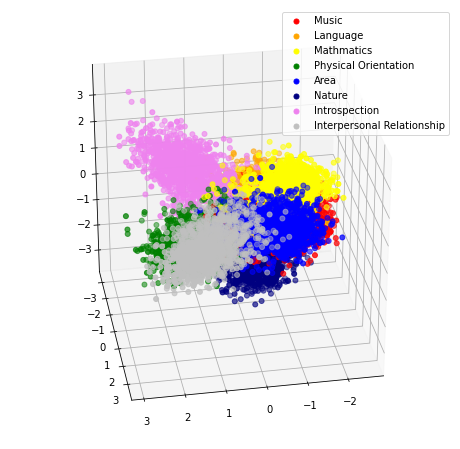

In [16]:
#그래프 3d
targets_3d = ['Music', 'Language', 'Mathmatics', 'Physical Orientation', 'Area', 'Nature', 'Introspection', 'Interpersonal Relationship']
colors_3d = ['red', 'orange', 'yellow', 'green', 'blue', 'navy', 'violet', 'silver']

from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure(figsize = (8, 8))
ax2 = fig2.add_subplot(111, projection='3d');
for target, color in zip(targets_3d, colors_3d):
  indicesToKeep = finalDf_3d['Class'] == target
  ax2.scatter(pDf_3d.loc[indicesToKeep, 'principal component1'], pDf_3d.loc[indicesToKeep, 'principal component2'], pDf_3d.loc[indicesToKeep, 'principal component3'], c=color, s=25);

ax2.legend(targets_3d)
ax2.view_init(30, 80) #그래프 보는 각도 조정
ax2.grid()

AI 테스트용 사전 코드 (PCA 사용 후)


In [17]:
#인공지능 PCA 데이터로 제작
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(principalDf, classData_pca, test_size=0.1999)

# 훈련 데이터를 사용하여 인공지능 모델 학습
knn_pca = KNeighborsClassifier(n_neighbors=250)
knn_pca.fit(x_train_pca, y_train_pca)


# 학습된 knn 모델로 새 변수 예측
setPrintLength(0)
print()
print("-----------------------------------------------------------------")
y_pred = knn.predict(x_test)
# print('Prediction:\n', y_pred)
# print('Answer: \n', y_test)

# 모델 평가
score = knn_pca.score(x_test_pca, y_test_pca)
print('Attempted Percentage (After PCA) : {0:.2f}%'.format(score*100))
print("-----------------------------------------------------------------")
print()



-----------------------------------------------------------------
Attempted Percentage (After PCA) : 64.48%
-----------------------------------------------------------------



In [18]:
# --------------------------------------------------------------------------------------------
# # 결과값 예측용 데이터 프레임 제작
# d_2 = {'Music': [musicAverage], 'Language': [langAverage] , 'Mathmatics': [mathAverage], 
#      'Physical Orientation': [physAverage], 'Area': [areaAverage], 'Nature': [natureAverage], 
#      'Introspection': [introAverage], 'Interpersonal Relationship': [interAverage]}

# df = pd.DataFrame(d, columns = d).head()

#df = pd.DataFrame(data = d)

# 데이터 프레임 확인 (commentable)
df_test_2 = df_test.values
df_test_horizontal = df_test_2.T
df_pca_standardized = StandardScaler().fit_transform(df_test_horizontal)
df_pca_standardized = df_pca_standardized.T
df_pca_standardized = pd.DataFrame(df_pca_standardized, columns = d).head()
df_pca_standardized = pd.concat([df_pca_standardized, df_pca_standardized], axis = 0)  #데이터가 고차원이여야 pca가 작동하기에 일부러 두배로 만듬
# print (df_pca_standardized)

principalComponents_pca = pca.fit_transform(df_pca_standardized) #pca 제작
# print("pca: ", principalComponents_pca)
principalDf_pca = pd.DataFrame(data=principalComponents_pca, columns = ['principal component1', 'principal component2'])


principalDf_pca.columns = ['a', 'b']
# print (principalDf_pca)

principalDf_pca = principalDf_pca.drop(principalDf_pca.index[1])
# print (principalDf_pca)


# 클래스 결과값 예측
y_pred = knn_pca.predict(principalDf_pca)
# y_pred = np.delete(y_pred, 1) 
y_pred_num = typeChanger(y_pred, 0) #숫자 변환
 #두배로 만든거 다시 축소

#예상치 출력
print ("") 
print ("-----------------------------------------------------")
print ("예상 분류: ", y_pred)
print(pd.DataFrame(knn_pca.predict_proba(principalDf_pca), columns=knn_pca.classes_))
#knn.kneighbors(df, 100)
print ("-----------------------------------------------------")


-----------------------------------------------------
예상 분류:  ['Nature']
    Area  Interpersonal Relationship  Introspection  Language  Mathmatics  Music  Nature  Physical Orientation
0  0.072                       0.092          0.044     0.084       0.144    0.1   0.368                 0.096
-----------------------------------------------------
